オリジナル作成: 2011/04/08

<html id="* 第1章-Sageを使って線形回帰を試してみる">
	<author>Hiroshi TAKEMOTO</author>
	(<email>take.pwave@gmail.com</email>)
	
	<h1>第1章-Sageを使って線形回帰を試してみる</h1>
	<p>
	<a href="http://www.amazon.co.jp/dp/443110013X/">パターン認識と機械学習</a>
	は、機械学習に関するとても優れた教科書です。ここでは、Sageを使って教科書の例題を実際に試してみます。
	</p>
	
	<p>
		第1章の例題として、$ sin(2 \pi x) $の回帰問題について見てみます。
	</p>
</html>

<html id="** データについて">
	<h2>データについて</h2>
	<p>
		上巻の付録Aにあるように http://research.microsoft.com/~cmbishop/PRML から
		例題のデータをダウンロードすることができます。
	</p>
	<p>
		これから計算に使うSin曲線は、
$$ 
		y = sin(2 \pi x) + \mathcal{N}(0,0.3) 
$$
		で与えられたデータです。ここでは、curve fitting dataで提供されているデータを使用します。
	</p>
	<p>
		最初に、データを座標Xと目的値tにセットし、sin曲線と一緒に表示してみます。
	</p>
</html>

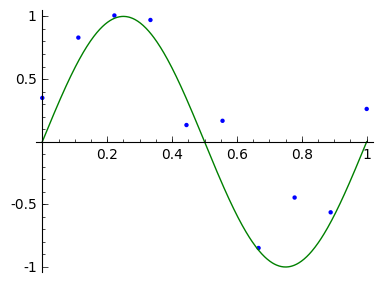

In [1]:
# PRMLのsin曲線のデータ
data = matrix([
        [0.000000, 0.349486],
        [0.111111, 0.830839],
        [0.222222, 1.007332],
        [0.333333, 0.971507],
        [0.444444, 0.133066],
        [0.555556, 0.166823],
        [0.666667, -0.848307],
        [0.777778, -0.445686],
        [0.888889, -0.563567],
        [1.000000, 0.261502],
        ]);
X = data.column(0)
t = data.column(1)
M = 3;
# データのプロット
x = var('x');
sin_plt = plot(sin(2*pi*x),[x, 0, 1], rgbcolor='green')
data_plt = list_plot(zip(X, t))
(data_plt + sin_plt).show(figsize=4)

<html id="** 最小自乗法の解">
	<h2>最小自乗法の解</h2>
	<p>
		3章の式(3.15)によると最小自乗法の解は、
$$ 
		W_{ML} = ( \Phi^T \Phi )^{-1} \Phi^T t
$$
		で与えられます。ここで、$\Phi$ は計画行列(design matrix)と呼ばれ、その要素は、$\Phi_{nj} = \phi_j(x_n)$
		与えらます。	
	</p>
	<p>
		また、行列 $ \Phi^{\dagger} $は、ムーア＿ベンローズの疑似逆行列と呼ばれています。
$$
		\Phi^{\dagger} = \left( \Phi^T \Phi \right)^{-1} \Phi^T
$$
	</p>
</html>


<html id="*** 多項式フィッティング">
	<h3>多項式フィッティング</h3>
	<p>
		多項式フィッティングの式(1.1)では、$y(x, w)$を以下のように定義します。
$$ 
		y(x, w) = \sum^{M}_{j=0} w_j x^j
$$
	</p>
	<p>
		そこで、$\phi_j(x)$を以下のように定義します。
$$
		\phi_j(x) = x^j
$$
	</p>
</html>

In [2]:
# Φ関数定義
def _phi(x, j):
    return x^j

<html id="*** 行列のセットと解の計算">
	<h3>行列のセットと解の計算</h3>
	<p>
		定義に従って計画行列$\Phi$、計画行列の転置行列$\Phi^T$、ムーア＿ベンローズの疑似逆行列$\Phi^\dagger$を求め、
		平均の重み$W_ML$を計算します。
	</p>
</html>

In [3]:
# 計画行列Φ
Phi = matrix([[ _phi(x,j) for j in range(0, (M+1))] for x in X.list()])
Phi_t = Phi.transpose()
# ムーア＿ベンローズの疑似逆行列
Phi_dag = (Phi_t * Phi).inverse() * Phi_t
# 平均の重み
Wml = Phi_dag * t; Wml

(0.313702727439780, 7.98537103199157, -25.4261022423404, 17.3740765279263)

<html id="*** 多項式yの定義">
	<h3>多項式yの定義</h3>
	<p>
		sageでは、多項式y(x)を以下のように定義します。
	</p>
</html>

In [4]:
# 出力関数yの定義
y = lambda x : sum(Wml[i]*x^i for i in range(0, (M+1)))

<html id="*** 多項式線形回帰の結果">
	<h3>多項式線形回帰の結果</h3>
	<p>
		$M=3$の時の、多項式回帰の結果（赤）をサンプリング（青）とオリジナルの$sin(2 \pi x)$を合わせて
		プロットします。
	</p>
</html>

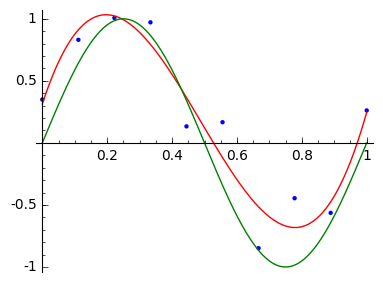

In [5]:
y_plt = plot(y, [x, 0, 1],  rgbcolor='red')
(y_plt + data_plt + sin_plt).show(figsize=4)

<html id="*** 様々なMの結果">
	<h3>様々なMの結果</h3>
	<p>
		図1.3に相当する図を表示します。スライダーでMの値を変えてみてください。
	</p>
	<p>
		$M=9$ではすべての点を通る曲線になりますが、元のsin曲線とはかけ離れた形になります。
		これは、過学習（over fitting）と呼ばれる現象で、機械学習はこの過学習との戦いになります。
	</p>
</html>

jupyterノートブックでは@interactがうまく動かない。
```python
# PRMLの図1.3
@interact
def _(M=(0..9)):
    # 計画行列Φ
    Phi = matrix([[ _phi(x,j) for j in range(0, (M+1))] for x in X.list()])
    Phi_t = Phi.transpose()
    # ムーア＿ベンローズの疑似逆行列
    Phi_dag = (Phi_t * Phi).inverse() * Phi_t
    # 平均の重み
    Wml = Phi_dag * t
    f = lambda x : sum(Wml[i]*x^i for i in range(0, (M+1)))
    y_plt = plot(f, [x, 0, 1],  rgbcolor='red')
    (y_plt + data_plt + sin_plt).show(ymin=-1.5, ymax=1.5)
```

<html id="*** 100個の検証用データを生成">
	<h3>100個の検証用データを生成</h3>
	<p>
		サンプルを100個に増やした検証用データを生成します。
	</p>
</html>

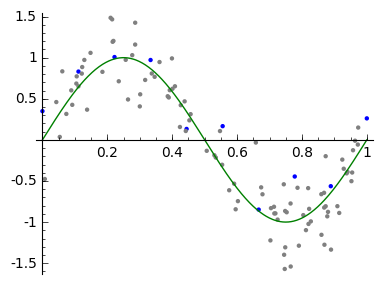

In [6]:
# 100個の検証用データを生成する
X100 = vector([random() for i in range(100)]); 
t100 = vector([(sin(2*pi*x) + +gauss(0, 0.3)).n() for x in X100.list()]);
#　100個のデータをプロット
lst100_plt = list_plot(zip(X100, t100), rgbcolor='gray');
(data_plt + lst100_plt + sin_plt).show(figsize=4)

<html id="*** サンプルを増やした場合">
	<h3>サンプルを増やした場合</h3>
	<p>
		サンプルを100個に増やし、$M=9$の多項式フィッティングを行ったのが、以下の図です（原書の図1.6に対応）。
	</p>
	<p>
		サンプルを増やせば、$M=9$でも元のsin曲線に近い形になりますが、少数の貴重なサンプルではこのような方法は使えません。
	</p>
</html>

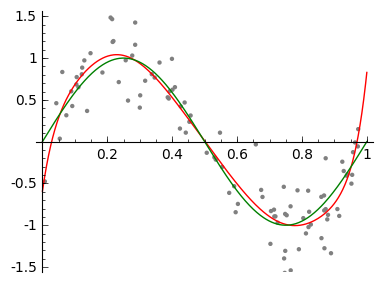

In [7]:
M = 9;
# 計画行列Φ
Phi = matrix([[ _phi(x,j) for j in range(0, (M+1))] for x in X100.list()]); 
Phi_t = Phi.transpose();
# ムーア＿ベンローズの疑似逆行列
Phi_dag = (Phi_t * Phi).inverse() * Phi_t; 
# 平均の重み
Wml = Phi_dag * t100; Wml
f = lambda x : sum(Wml[i]*x^i for i in range(0, (M+1)));
y_plt = plot(f, [x, 0, 1],  rgbcolor='red'); 
(y_plt + lst100_plt + sin_plt).show(figsize=4, ymin=-1.5, ymax=1.5);

<html id="*** 平均自乗平方根誤差">
	<h3>平均自乗平方根誤差</h3>
	<p>
		原書の1.1では訓練データとテスト用データの平均自乗平方根誤差、
$$
		E(w) = \frac{1}{2} \sum^N_{n=1} \{ y(x_n, w) - t_n \}^2
$$
		を使って最適なMの値を求める手法を紹介しています。
	</p>
	<p>
		以下に訓練用データの$E_{RMS}$（青）、テスト用データの$E_{RMS}$（赤）でMに対する
		値の変化を示します。M=3で訓練、テスト共に低い値となることが見て取れます。
	</p>
</html>

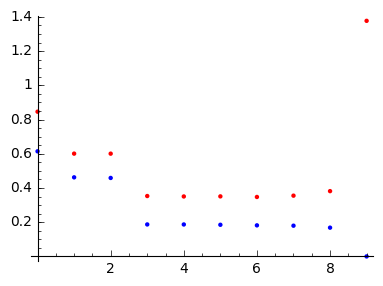

In [8]:
# 平均自乗平方根誤差
Erms_t = [];
Erms_t100 = [];
for M in range(10):
    # 計画行列Φ
    Phi = matrix([[ _phi(x,j) for j in range(0, (M+1))] for x in X.list()]); 
    Phi_t = Phi.transpose();
    # ムーア＿ベンローズの疑似逆行列
    Phi_dag = (Phi_t * Phi).inverse() * Phi_t; 
    # 平均の重み
    Wml = Phi_dag * t; 
    f = lambda x : sum(Wml[i]*x^i for i in range(0, (M+1)));
    Erms_t += [sqrt(sum((t[i] - f(X[i]))^2 for i in range(len(t)))/len(t))];
    Erms_t100 += [sqrt(sum((t100[i] - f(X100[i]))^2 for i in range(len(t100)))/len(t100))];
Erms_t_plt = list_plot(Erms_t);
Erms_t100_plt = list_plot(Erms_t100, rgbcolor = 'red');
(Erms_t_plt + Erms_t100_plt).show(figsize=4);
# グラフの傾向はPRMLと同じですが、値が若干ずれている？

<html id="** リッジ回帰">
	<h2>リッジ回帰</h2>
	<p>
		誤差関数にペナルティ項を追加し、過学習を防ぐ例として、リッジ回帰が紹介されています。
$$
		\tilde{E}(w) = \frac{1}{2} \sum^N_{n=1} \{ y(x_n, w) - t_n \}^2 + \frac{\lambda}{2} ||w||^2
$$
		を使って正規化します。
	</p>
	<p>
		$y(x_n,w)$を$\phi$と$w$で書き替えると、原書式(3.27)になる。
$$
		\tilde{E}(w) = \frac{1}{2} \sum^N_{n=1} \{ t_n - w^T\phi(x_n) \}^2 + \frac{\lambda}{2} ||w||^2
$$
	</p>
	<p>
		ｗに関する勾配を０にすると、原書式(3.28)が求まる。
$$
		w = \left( \lambda I + \Phi^T\Phi \right)^{-1} \Phi^T t
$$
	</p>
	<p>
		以下にM=9の練習用データにリッジ回帰を行った結果を示します。
	</p>
</html>

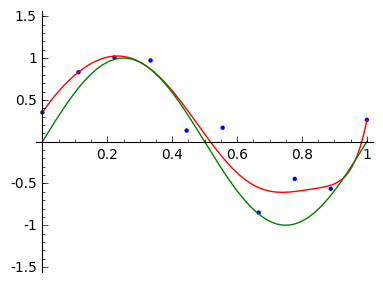

In [9]:
# リッジ回帰
M = 9;
N = len(t);
lam = n(e^-18);
Phi = matrix([[ _phi(x,j) for j in range(0, (M+1))] for x in X.list()]); 
Phi_t = Phi.transpose();
# ムーア＿ベンローズの疑似逆行列
Phi_dag = (lam*matrix((M+1),(M+1),1) + Phi_t * Phi).inverse() * Phi_t; 
# 平均の重み
Wml = Phi_dag * t;
f = lambda x : sum(Wml[i]*x^i for i in range(0, (M+1)));
y_plt = plot(f, [x, 0, 1],  rgbcolor='red'); 
(y_plt + data_plt + sin_plt).show(figsize=4, ymin=-1.5, ymax=1.5);

<html id="*** リッジ回帰に対する平均自乗平方根誤差">
	<h3>リッジ回帰に対する平均自乗平方根誤差</h3>
	<p>
		リッジ回帰に対する訓練用データの$E_{RMS}$（青）、テスト用データの$E_{RMS}$（赤）でMに対する
		値の変化を示します。
	</p>
</html>

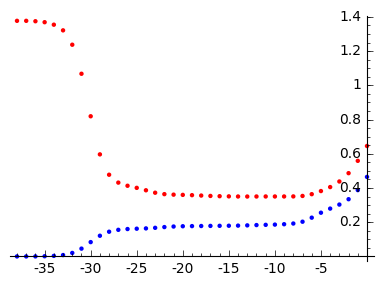

In [10]:
# Ermsを取って過学習の度合いを見る
# 平均自乗平方根誤差
Erms_t = [];
Erms_t100 = [];
for ln_lam in range(-38, 1):
    lam = n(e^ln_lam);
    Phi = matrix([[ _phi(x,j) for j in range(0, (M+1))] for x in X.list()]); 
    Phi_t = Phi.transpose();
    # ムーア＿ベンローズの疑似逆行列
    Phi_dag = (lam*matrix((M+1),(M+1),1) + Phi_t * Phi).inverse() * Phi_t; 
    # 平均の重み
    Wml = Phi_dag * t;
    f = lambda x : sum(Wml[i]*x^i for i in range(0, (M+1)));
    Erms_t += [[ln_lam, sqrt(sum((t[i] - f(X[i]))^2 for i in range(len(t)))/len(t))]];
    Erms_t100 += [[ln_lam, sqrt(sum((t100[i] - f(X100[i]))^2 for i in range(len(t100)))/len(t100))]];
Erms_t_plt = list_plot(Erms_t);
Erms_t100_plt = list_plot(Erms_t100, rgbcolor = 'red');
(Erms_t_plt + Erms_t100_plt).show(figsize=4);

<html id="** ベイズ的なフィッティング">
	<h2>ベイズ的なフィッティング</h2>
	<p>
		もっとも良い結果を示すのが、ベイズ的なフィッティングの結果です（原著図1.17）。
$$
		m_N = \beta S_N \Phi^T t
$$
$$
		S^{-1}_{N} = \alpha I + \beta \Phi^T \Phi
$$
		で与えられます。（$m_N$は、直線回帰の$W_{ML}$に相当します）
	</p>
	<p>
		以下に$\alpha = 5 \times 10^{-3}, \beta = 11.1$の練習用データのベイズ的なフィッティング結果を示します。
	</p>
</html>

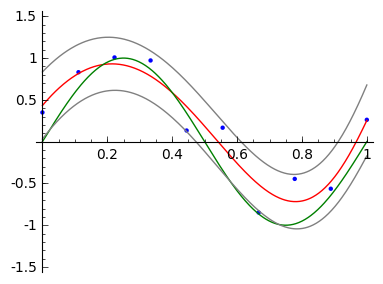

In [11]:
# ベイズ的なフィッティング
# α=5*10^-3, β=11.1を使用
alpha = 5*10^-3;
beta = 11.1;
Phi = matrix([[ _phi(x,j) for j in range(0, (M+1))] for x in X.list()]); 
Phi_t = Phi.transpose();
# ムーア＿ベンローズの疑似逆行列
Phi_dag = (alpha*matrix((M+1),(M+1),1) + beta*Phi_t * Phi).inverse() * Phi_t; 
# 平均の重み
Wml = beta*Phi_dag * t;
f = lambda x : sum(Wml[i]*x^i for i in range(0, (M+1)));
# 分散
def s(x):
    phi_x = vector([x^i for i in range(M+1)]);
    s_sqr = 1/beta + phi_x * Phi_dag * phi_x;
    return sqrt(s_sqr);
s_u_plt = plot(lambda x : f(x) + s(x), [x, 0, 1],  rgbcolor='grey'); 
s_d_plt = plot(lambda x : f(x) - s(x), [x, 0, 1],  rgbcolor='grey'); 
y_plt = plot(f, [x, 0, 1],  rgbcolor='red'); 
(y_plt + data_plt + sin_plt + s_u_plt + s_d_plt).show(figsize=4, ymin=-1.5, ymax=1.5);

<html id="** lasso回帰">
	<h2>lasso回帰</h2>
	<p>
		鈴木由宇さんから、最近はlasso回帰も注目されていると聞き、
		<a href="http://d.hatena.ne.jp/smly/20100630/1277904761">smlyさんのブログ「線形回帰モデルとか」</a>
		から、cvx_optを使った方法を使わせて頂き、Sageでプロットしてみました。
	</p>
	<p>
		lasso回帰は、リッジ回帰のペナルティ項が２次から絶対値になったものです。
$$
		\tilde{E}(w) = \frac{1}{2} \sum^N_{n=1} \{ y(x_n, w) - t_n \}^2 + \frac{\lambda}{2} ||w||
$$
	</p>
</html>

In [12]:
# lasso回帰
# http://d.hatena.ne.jp/smly/20100630/1277904761
# を参考にlasso回帰を実施
# cnvx_optの宣言
from cvxopt import solvers
from cvxopt.base import matrix as _matrix
import numpy as np
#
M = 9
lim = 30.0
# 計画行列Φ
phi = _matrix([[ float(_phi(x,j).n()) for j in range(0, (M+1))] for x in X.list()]).T; 
P = _matrix(float(0.0), (2*(M+1), 2*(M+1)))
P[:M+1, :M+1] = phi.T * phi
q = _matrix(float(0.0), (2*(M+1), 1))
t = _matrix(np.matrix(t)).T
q[:M+1] = -phi.T * t
Ident = _matrix(np.identity(M+1, float))
G = _matrix([[Ident, -Ident, _matrix(float(0.0), (1,M+1))],[-Ident, -Ident, _matrix(float(1.0), (1,M+1))]])
h = _matrix(float(lim), (2*(M+1)+1,1))
# constraint (PRML ex.3.5, eq3.30)
x = solvers.qp(P, q, G, h)['x'][:M+1]
Wml = np.array(x).reshape(M+1)
print Wml

     pcost       dcost       gap    pres   dres
 0: -7.3129e-01 -1.5730e+04  2e+04  5e-17  8e+01
 1: -1.1908e+00 -2.3198e+02  2e+02  2e-16  1e+00
 2: -1.6934e+00 -1.1863e+01  1e+01  2e-16  5e-02
 3: -1.8817e+00 -2.4425e+00  6e-01  2e-16  2e-03
 4: -1.8890e+00 -1.9346e+00  5e-02  2e-16  2e-04
 5: -1.8949e+00 -1.9100e+00  2e-02  2e-16  4e-05
 6: -1.8990e+00 -1.9027e+00  4e-03  2e-16  2e-14
 7: -1.8998e+00 -1.9009e+00  1e-03  4e-16  3e-14
 8: -1.9003e+00 -1.9005e+00  2e-04  3e-16  4e-14
 9: -1.9004e+00 -1.9005e+00  1e-04  2e-16  3e-14
10: -1.9004e+00 -1.9004e+00  1e-05  4e-16  3e-14
11: -1.9004e+00 -1.9004e+00  2e-07  5e-16  5e-14
Optimal solution found.
[  3.50668337e-01   4.72355549e+00  -5.66598955e-01  -3.33176635e+01
   5.28640506e-04   5.46111227e+01   2.04434686e+01  -9.73943588e-04
  -1.30982583e+02   8.49936038e+01]


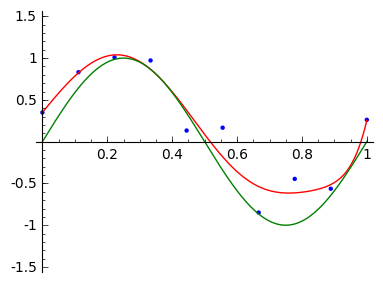

In [13]:
var('x')
f = lambda x : sum(Wml[i]*_phi(x,i) for i in range(0, (M+1)));
y_plt = plot(f(x), [x, 0, 1],  rgbcolor='red'); 
(y_plt + data_plt + sin_plt).show(figsize=4, ymin=-1.5, ymax=1.5);